 # Evapotranspiration - Oudin-Method

In [1]:
# read all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

In [2]:
#load in the data
data = pd.read_excel('oudin.xlsx', index_col='datum', parse_dates=True)

## Oudin Formula

$$ETP = Er * \frac{Ta+5}{100} [\frac{mm}{d}]$$

        ETP...potential evapotranspiration [mm/d]
        Er...Evaporation due to the extraterrestrial radiation [mm/d] (RE_mm_day)
        Ta...average tenperatur [°C]

In [3]:
# To calculate the potential evapotranspiration (ETP_oudin) we will use a formula by Oudin et al. (2005)

def ETP_oudin(Re_mm_day, Temp_avg):
    """
    This function calculates the evapotranspiration according to the Oudin method
    Parameters
    ----------
    Re_mm_day : float
        Extraterrestrial radiation in mm/day
    Temp_avg : float
        Average temperature in degrees Celsius
    Returns
    -------
    ETP : float
        Evapotranspiration in mm/day
    """

    if Re_mm_day * (Temp_avg + 5) / 100 > 0:
        ETP = Re_mm_day * (Temp_avg + 5) / 100

    else:
        ETP = 0

    return ETP

## ETP_oudin depends on the extraterrestrial radiation (RE_mm_day) and the average temperature.
## Hence as a next step we need to get those datapoints

### average temperature
    For the average Temperature data will simply be imported from our .xlsx-data.

### extraterrestrial radiation
$$ E_r = \frac{R_e}{\lambda * \rho} [\frac{mm}{d}] $$


    Er...Evaporation due to the extraterrestrial radiation [mm/d] (RE_mm_day)
    Re...extraterrestrial radiation [MJ/(mm2*d)]
    lambda...evaporation heat of water (= 2,45 [MJ/k])
    rho...density of water ( = 1 [kg/l])

In [4]:
# As the .xlsx-data does not contain the extraterrestrial radiarion (RE_mm_day) [mm/d] for our location (Graz),
# we will calculate it from what we have got

## lat...latitude of location (Graz) in degree
lat = 47

## M...latitude in radians
M = np.pi / 180 * lat

## doy...Day of the year from our .xlsx-data, type=class
doy = data.index.dayofyear

## Now some variables dependent on our doy
### dr is the inverse relative distance Earth-Sun????
### delta is the declination of the sun?????
### omega_s is the sunset hour angle?????
dr = 1 + 0.033 * np.cos(2 * np.pi * doy / 365)
delta = 0.409 * np.sin(2 * np.pi * doy / 365 - 1.39)
omega_s = np.arccos(-np.tan(M) * np.tan(delta))

#die nächsten zwei evt. als eine gleichung direkt in RE_mm_day?????
## Therefrom we calculate the extraterrestrial radiation in [MJ/m2/d]: Re
Re = 24 * 60 / np.pi * 0.082 * dr * (omega_s * np.sin(M) * np.sin(delta) + np.cos(M) * np.cos(delta) * np.sin(omega_s))

## And finally the extraterrestrial radiation (RE_mm_day) in [mm/d]
Re_mm_day = Re / 2.45


### calculation of ETP

In [5]:
# Calculate the ETP
## First we generate an array with same lenght as the data from our xlsx.-data.
## As we do not have values for ETP jet we will simply fill the array with zeros.
ETP = np.zeros(len(data))

## Now we replace each of the zeros by the ETP, calculatet from our ETP_oudin funktion and our parameters 
for i in np.arange(0, len(data)):
    ETP[i] = ETP_oudin(Re_mm_day[i], data['T (°C)'].values[i])

### ploting the data

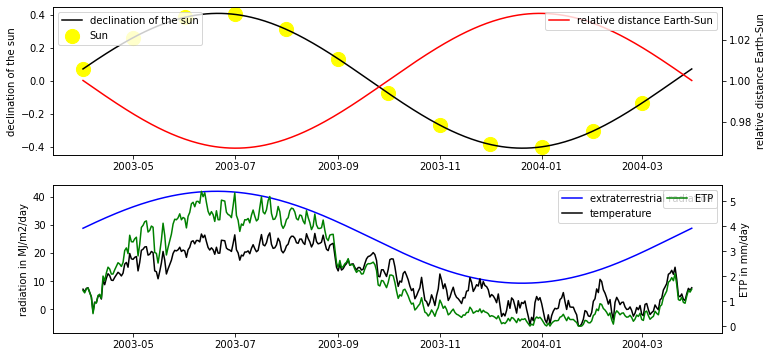

In [6]:
# For better visualisation we plot our calculatet ETP as well as the inbound parameters

## We create one plot showing the calculatet ATP as well as our Parameters (RE_mm_day and Temp_avg).
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

## To earn a better understanding of how the Sun influences the RE_mm_day we plot those interlinks as well
### We plot the declination
ax1.plot(data.index, delta, color='black', label='declination of the sun')
# plot a yellow sun symbol for each first day of the month
ax1.scatter(data.index[data.index.day == 1], delta[data.index.day == 1], marker='o', color='yellow', label='Sun', s=200)

axtwin = ax1.twinx()
# plot relative distance Earth-Sun
axtwin.plot(data.index, dr, color='red', label='relative distance Earth-Sun')

# plot the extraterrestrial radiation
ax2.plot(data.index, Re, color='blue', label='extraterrestrial radiation')

# plot temperature
ax2.plot(data.index, data['T (°C)'], color='black', label='temperature')

ax3 = ax2.twinx()
# plot the ETP
ax3.plot(data.index, ETP, color='green', label='ETP')

# add labels and legend
ax1.set_ylabel('declination of the sun')
axtwin.set_ylabel('relative distance Earth-Sun')
ax2.set_ylabel('radiation in MJ/m2/day')
ax3.set_ylabel('ETP in mm/day')
ax1.legend(loc='upper left')
axtwin.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')